In [1]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import time

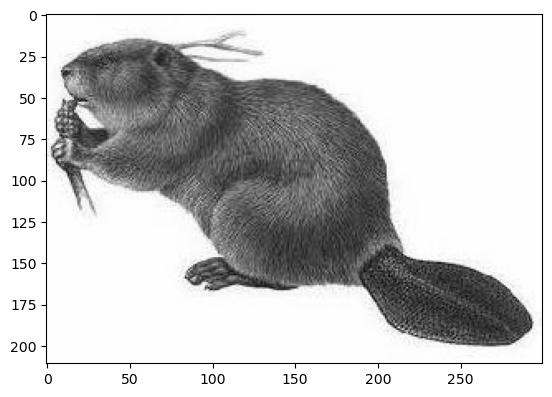

In [2]:
# Load an image
beaver = cv2.imread('images/beaver.png')
plt.imshow(cv2.cvtColor(beaver, cv2.COLOR_BGR2RGB))

In [4]:
# Members of cv2.xfeatures2d
dir(cv2.xfeatures2d)

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

(211, 300, 3) => (211, 300)


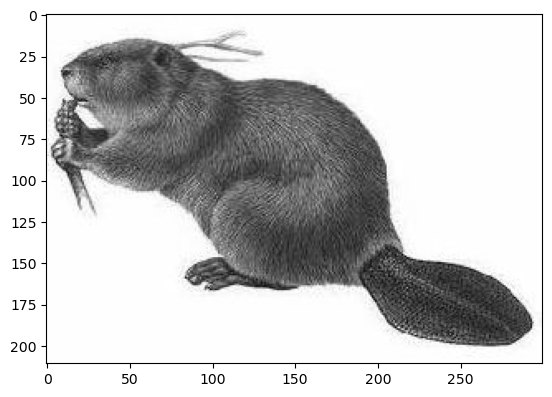

In [5]:
# Convert image color(BGR->Grayscale)
gray = cv2.cvtColor(beaver, cv2.COLOR_BGR2GRAY)
# You can convert the image when calling cv2.imread()
# gray = cv2.imread('images/beaver.png', cv2.IMREAD_GRAYSCALE)

print(str(beaver.shape) + " => " + str(gray.shape))
plt.imshow(gray, cmap='gray')

In [6]:
# SIFT feature detector/descriptor
sift = cv2.xfeatures2d.SIFT_create()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [7]:
# SIFT feature detection
start_time = time.time()
# kp = sift.detect(gray, None) # 2nd pos argument is a mask indicating a part of image to be searched in
kp = sift.detect(beaver, None) # 2nd pos argument is a mask indicating a part of image to be searched in
print('Elapsed time: %.6fs' % (time.time() - start_time))

NameError: name 'sift' is not defined

In [8]:
# Display the SIFT features
beaver_sift = cv2.drawKeypoints(beaver, kp, None)
plt.imshow(cv2.cvtColor(beaver_sift, cv2.COLOR_BGR2RGB))

NameError: name 'kp' is not defined

In [9]:
# Display the rich SIFT features
beaver_sift2 = cv2.drawKeypoints(beaver, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(beaver_sift2, cv2.COLOR_BGR2RGB))

NameError: name 'kp' is not defined

In [10]:
# Inspect the keypoints
print type(kp)
print len(kp)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (3307377051.py, line 2)

In [11]:
print type(kp[0])
print dir(kp[0])

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (2945010858.py, line 1)

In [12]:
# A keypoint's property
# kp is sorted by scale of the keypoints
print kp[-1].angle # Orientation
print kp[-1].class_id
print kp[-1].octave
print kp[-1].pt # Position
print kp[-1].response
print kp[-1].size # Scale

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (1770889982.py, line 3)

In [13]:
# Extract SIFT feature from the (gray) image and detected keypoints
start_time = time.time()
kp, des = sift.compute(gray, kp)
print('Elapsed time: %.6fs' % (time.time() - start_time))

# SIFT keypoints and descriptors at the same time
# start_time = time.time()
# kp, des = sift.detectAndCompute(gray, None)
# print('Elapsed time: %.6fs' % (time.time() - start_time))

NameError: name 'sift' is not defined

In [ ]:
# Inspect the descriptors
print type(des)
print des.shape
print des.dtype

<type 'numpy.ndarray'>
(144, 128)
float32


In [ ]:
print len(des[0, :])
print des[0, :]

128
[ 105.   19.    0.    0.    0.    0.    0.   14.  179.   42.    0.    0.
    0.    0.    0.    8.  102.   17.    0.    0.    0.    0.    0.    1.
    5.    4.    1.    1.    0.    0.    1.    1.  147.   28.    0.    0.
    0.    0.    0.   13.  179.   23.    0.    0.    0.    0.    0.   23.
  145.    5.    0.    0.    0.    0.    1.   19.    3.    1.    0.    0.
    0.    0.    5.    7.  112.   17.    0.    0.    0.    0.    0.   21.
  179.   22.    0.    0.    0.    0.    0.   41.  145.    6.    0.    0.
    0.    0.    0.   13.    5.    1.    0.    0.    0.    1.    0.    2.
  100.    4.    0.    0.    0.    0.    1.   48.  179.    0.    0.    0.
    0.    0.    0.  100.   74.    4.    0.    0.    0.    0.    0.   19.
    4.    3.    1.    0.    0.    0.    0.    1.]


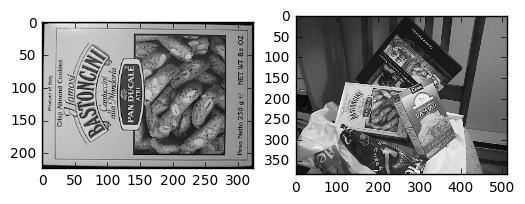

In [ ]:
# Open and show images
img1 = cv2.imread('images/box.png')
img2 = cv2.imread('images/box_in_scene.png')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [ ]:
# SIFT feature extracting
sift = cv2.xfeatures2d.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

start_time = time.time()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
print('Elapsed time: %.6fs' % (time.time() - start_time))

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

Elapsed time: 0.216835s
Image 1 - 604 feature detected
Image 2 - 969 feature detected


In [ ]:
# BFMatcher(Brute Force Matcher) with defalut setting
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
print('%d matches' % len(matches))

604 matches


In [ ]:
# Inspect matcher results
print type(matches)
print len(matches)
print type(matches[0])
print len(matches[0])

<type 'list'>
604
<type 'list'>
2


In [ ]:
print type(matches[0][0])
print dir(matches[0][0])

<type 'cv2.DMatch'>
['__class__', '__delattr__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']


In [ ]:
print matches[0][0].distance
print matches[0][0].queryIdx
print matches[0][0].trainIdx
print matches[0][0].imgIdx
print matches[0][1].distance
print matches[0][1].queryIdx
print matches[0][1].trainIdx
print matches[0][1].imgIdx

220.331573486
0
196
0
275.205383301
0
666
0


In [ ]:
# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

80 matches


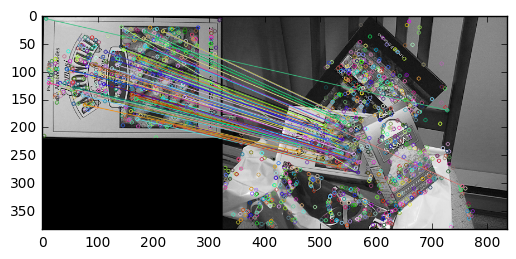

In [ ]:
# Display matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))